In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Softmax
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [2]:

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.reshape((train_images.shape[0], -1)) / 255.0
test_images = test_images.reshape((test_images.shape[0], -1)) / 255.0

class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(10)
])

model.compile(optimizer='adam',
              loss=SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10, batch_size=64,
          validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"Test accuracy: {test_acc:.2f}")

probability_model = tf.keras.Sequential([model, Softmax()])
predictions = probability_model.predict(test_images)
print(f"Predicted label: {class_names[np.argmax(predictions[0])]} | True label: {class_names[test_labels[0][0]]}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step


p:\VirtualEnvs\p_ds\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3320 - loss: 1.8548 - val_accuracy: 0.3998 - val_loss: 1.6759
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4069 - loss: 1.6588 - val_accuracy: 0.4225 - val_loss: 1.6164
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4341 - loss: 1.5799 - val_accuracy: 0.4501 - val_loss: 1.5445
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4592 - loss: 1.5179 - val_accuracy: 0.4619 - val_loss: 1.5167
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.4697 - loss: 1.4847 - val_accuracy: 0.4696 - val_loss: 1.4917
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4805 - loss: 1.4501 - val_accuracy: 0.4711 - val_loss: 1.4881
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.4900 - loss: 1.4236 - val_accuracy: 0.4753 - val_loss: 1.4744
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5011 - loss: 1.3974 - 

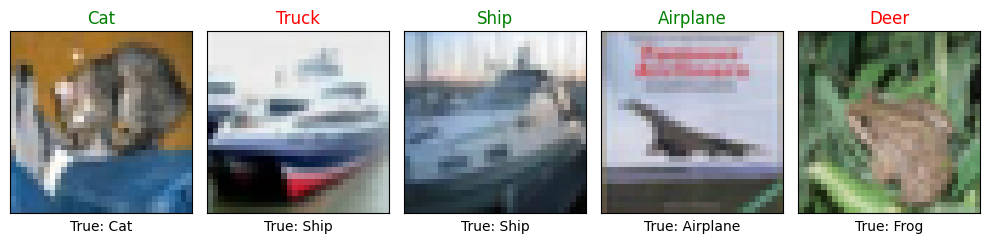

In [3]:
num_images_to_show = 5
plt.figure(figsize=(10, 5))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(test_images[i].reshape(32, 32, 3))
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]

    color = 'green' if pred_label == true_label else 'red'
    plt.title(pred_label, color=color)
    plt.xlabel(f"True: {true_label}")

plt.tight_layout()
plt.show()